<a href="https://colab.research.google.com/github/NourhanTamer20/SportsWear/blob/main/Sports_Wear_UseCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import re
import numpy as np

**Read Dataset**

In [ ]:
#read dataset
full_gen_data = pd.read_csv("/content/full_gen_data.csv")
full_gen_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [ ]:
full_gen_data

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0


**Dataset Preprocessing**

In [ ]:
## remove columns
data = full_gen_data.drop(["article" , "customer_id","article.1","sizes","rgb_r_main_col","rgb_g_main_col" ,"rgb_b_main_col","rgb_r_sec_col" ,"rgb_g_sec_col" ,"rgb_b_sec_col"] , axis = 1)
data.head()

,country,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,productgroup,category,cost,style,gender,label
0,Germany,28,5.95,3.95,0.663866,2016-03-27,0,0,SHOES,TRAINING,13.29,slim,women,0
1,Germany,28,5.95,3.95,0.663866,2016-03-27,0,0,SHORTS,TRAINING,2.29,regular,women,0
2,Germany,28,5.95,3.95,0.663866,2016-03-27,0,0,HARDWARE ACCESSORIES,GOLF,1.70,regular,women,0
3,Germany,28,5.95,3.95,0.663866,2016-03-27,0,0,SHOES,RUNNING,9.00,regular,kids,0
4,Germany,28,5.95,3.95,0.663866,2016-03-27,0,0,SHOES,RELAX CASUAL,9.60,regular,women,0


In [ ]:
##leave only years on retailweek date
data['retailweek'] = pd.DatetimeIndex(data['retailweek']).year
data

,country,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,productgroup,category,cost,style,gender,label
0,Germany,28,5.95,3.95,0.663866,2016,0,0,SHOES,TRAINING,13.29,slim,women,0
1,Germany,28,5.95,3.95,0.663866,2016,0,0,SHORTS,TRAINING,2.29,regular,women,0
2,Germany,28,5.95,3.95,0.663866,2016,0,0,HARDWARE ACCESSORIES,GOLF,1.70,regular,women,0
3,Germany,28,5.95,3.95,0.663866,2016,0,0,SHOES,RUNNING,9.00,regular,kids,0
4,Germany,28,5.95,3.95,0.663866,2016,0,0,SHOES,RELAX CASUAL,9.60,regular,women,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,227,57.95,26.95,0.465056,2016,0,0,SWEATSHIRTS,TRAINING,4.20,wide,women,0
99996,Germany,227,57.95,26.95,0.465056,2016,0,0,SHOES,FOOTBALL GENERIC,9.90,wide,unisex,0
99997,Germany,227,57.95,26.95,0.465056,2016,0,0,SHOES,INDOOR,5.20,wide,women,0
99998,Germany,227,57.95,26.95,0.465056,2016,0,0,HARDWARE ACCESSORIES,RUNNING,1.29,slim,women,0


In [ ]:
##Check correlation between promo1 and sales
sales=data['sales'].sum()
print(sales)
c = np.corrcoef(data['sales'],data['promo1'])
print('Correlations between sales and promo1\n',c)

5678180
Correlations between sales and promo1
 [[1.         0.11483822]
 [0.11483822 1.        ]]


In [ ]:
##Check Total group's Sales
sales

5678180

**Data visualization**

<ipython-input-22-7eedd0059278>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['category']).sum().plot(kind='pie', y='sales')


<Axes: ylabel='sales'>

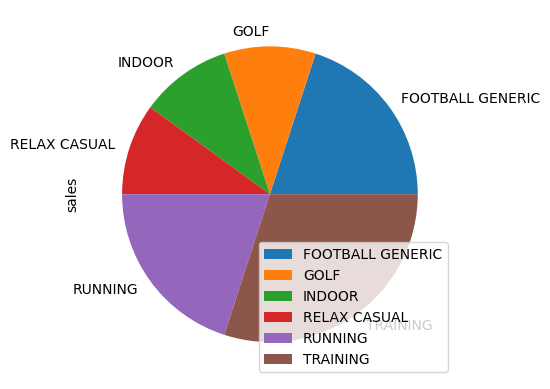

In [ ]:
import matplotlib.pyplot as plt

# Plotting the pie chart for sales to category
data.groupby(['category']).sum().plot(kind='pie', y='sales')

<ipython-input-58-80e2019e9fce>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['country']).sum().plot(kind='pie', y='sales')


<Axes: ylabel='sales'>

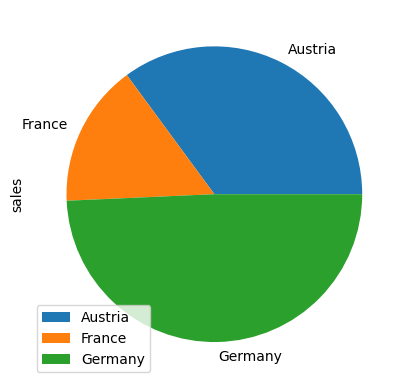

In [ ]:
# Plotting the pie chart for sales to country
data.groupby(['country']).sum().plot(kind='pie', y='sales')

In [ ]:
data.groupby(data.retailweek)
data

,country,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,productgroup,category,cost,style,gender,label
0,Germany,28,5.95,3.95,0.663866,2016,0,0,SHOES,TRAINING,13.29,slim,women,0
1,Germany,28,5.95,3.95,0.663866,2016,0,0,SHORTS,TRAINING,2.29,regular,women,0
2,Germany,28,5.95,3.95,0.663866,2016,0,0,HARDWARE ACCESSORIES,GOLF,1.70,regular,women,0
3,Germany,28,5.95,3.95,0.663866,2016,0,0,SHOES,RUNNING,9.00,regular,kids,0
4,Germany,28,5.95,3.95,0.663866,2016,0,0,SHOES,RELAX CASUAL,9.60,regular,women,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,227,57.95,26.95,0.465056,2016,0,0,SWEATSHIRTS,TRAINING,4.20,wide,women,0
99996,Germany,227,57.95,26.95,0.465056,2016,0,0,SHOES,FOOTBALL GENERIC,9.90,wide,unisex,0
99997,Germany,227,57.95,26.95,0.465056,2016,0,0,SHOES,INDOOR,5.20,wide,women,0
99998,Germany,227,57.95,26.95,0.465056,2016,0,0,HARDWARE ACCESSORIES,RUNNING,1.29,slim,women,0


In [ ]:
sales

5678180

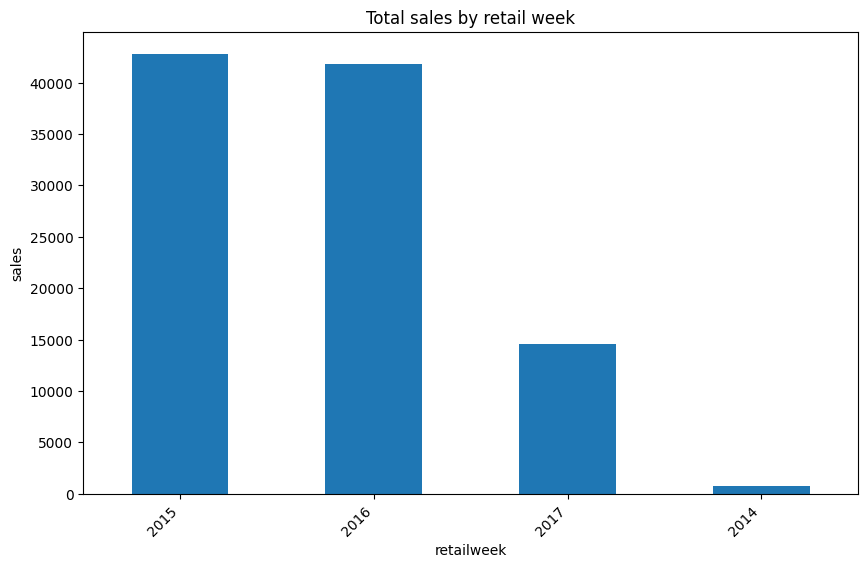

In [ ]:
plt.figure(figsize=(10, 6))
rweek= data["retailweek"].value_counts()
rweek.plot(kind="bar")
plt.xlabel("retailweek")
plt.ylabel("sales")
plt.title("Total sales by retail week")
plt.xticks(rotation=45, ha='right')
plt.show()

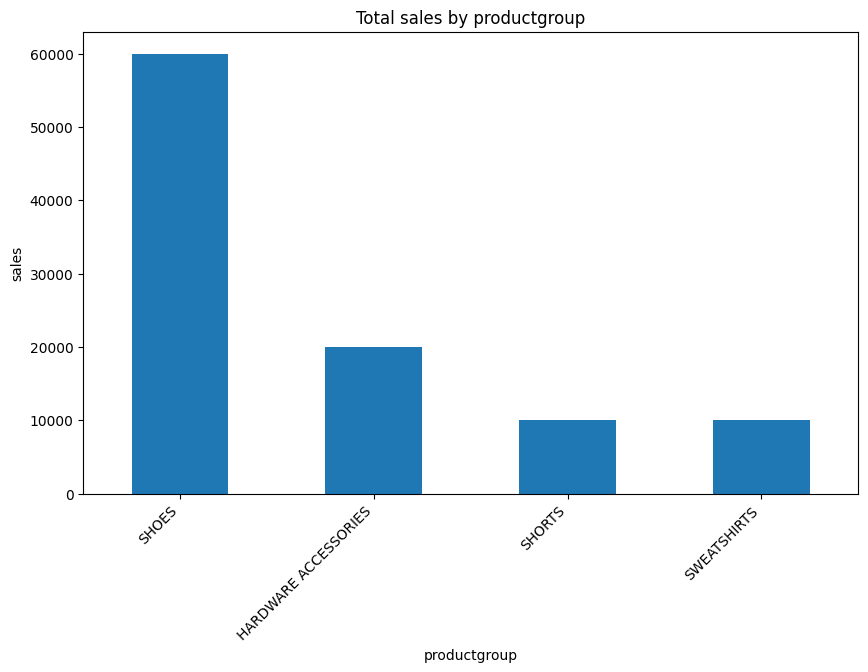

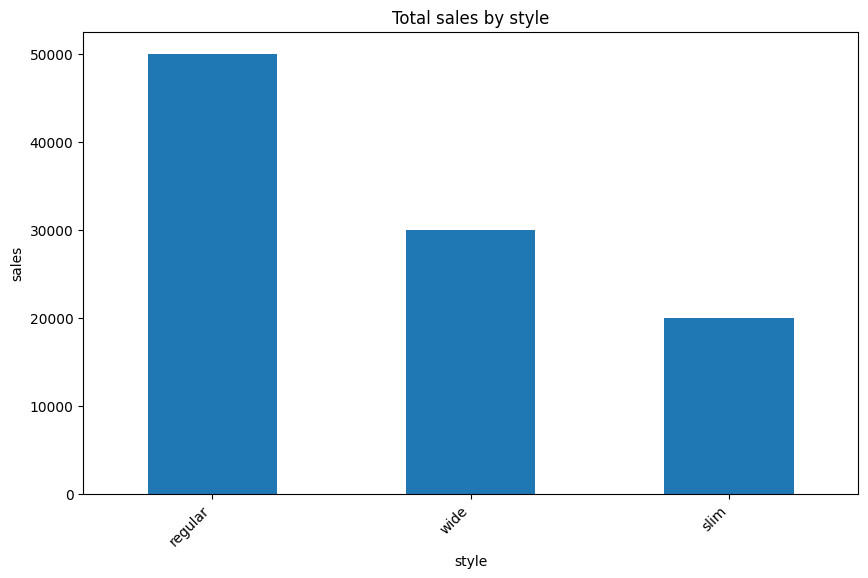

In [ ]:
plt.figure(figsize=(10, 6))
pgroup = data["productgroup"].value_counts()
pgroup.plot(kind="bar")
plt.xlabel("productgroup")
plt.ylabel("sales")
plt.title("Total sales by productgroup")
plt.xticks(rotation=45, ha='right')
plt.show()



plt.figure(figsize=(10, 6))
style_counts = data["style"].value_counts()
style_counts.plot(kind="bar")
plt.xlabel("style")
plt.ylabel("sales")
plt.title("Total sales by style")
plt.xticks(rotation=45, ha='right')
plt.show()

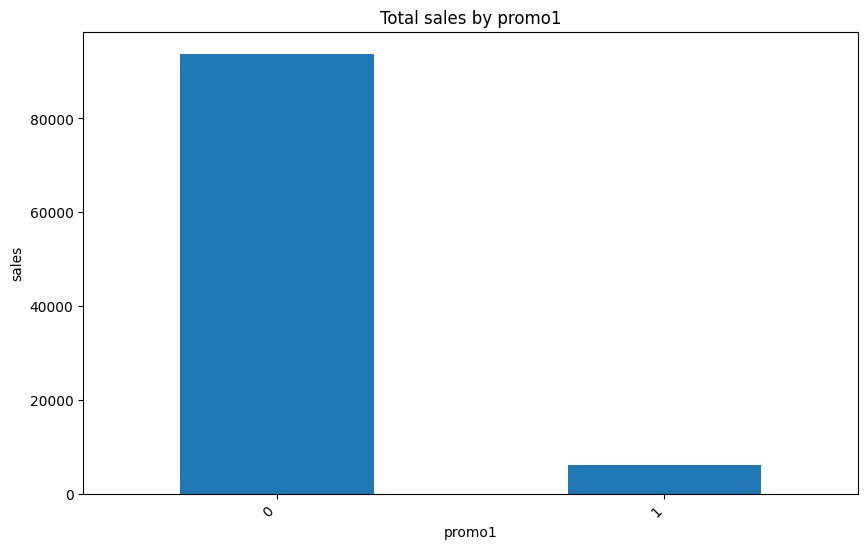

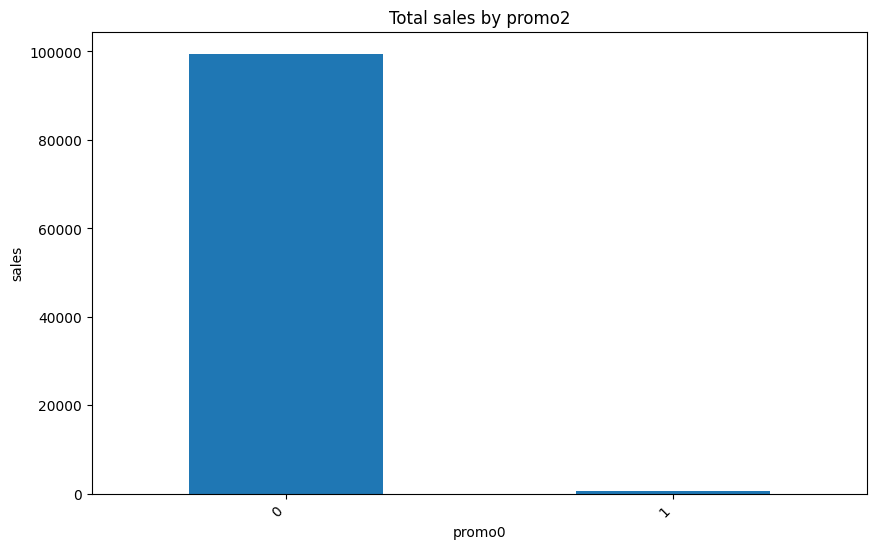

In [ ]:
from sys import ps2
plt.figure(figsize=(10, 6))
p1 = data["promo1"].value_counts()
p1.plot(kind="bar")
plt.xlabel("promo1")
plt.ylabel("sales")
plt.title("Total sales by promo1")
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(10, 6))
p2 = data["promo2"].value_counts()
p2.plot(kind="bar")
plt.xlabel("promo0")
plt.ylabel("sales")
plt.title("Total sales by promo2")
plt.xticks(rotation=45, ha='right')
plt.show()